In [34]:
import gym
from gym import spaces
import numpy as np
import time
import matplotlib.pyplot as plt
import time

# PART I

The environment that we defined is called the "LawnmowerEnv". It is a 4x4 grid world where the agent (represented by a lawnmower) moves around to collect rewards and avoid obstacles.

**Actions**

The agent has 4 possible actions:

- Move right
- Move left
- Move up
- Move down

**States**

It is represented by a 4x4 grid where each cell can have one of the following values:

+ 1 if the agent is present in that cell
+ 0 if the cell is empty
+ 0.8 if the cell contains the target goal position
+ 0.7 if the cell contains a gold coin
+ 0.3 if the cell contains a danger zone 1
+ 0.2 if the cell contains a danger zone 2

**Rewards**

The agent receives different rewards based on the state it transitions to after taking an action:

- +20 if the agent reaches the target goal position
- +7 if the agent reaches the gold coin 
- +5 if the agent reaches the gold coin 
- -4 if the agent enters the danger zone 1 
- -6 if the agent enters the danger zone 2 

**Objective**

The main objective of the agent is to navigate through the grid world and reach the target goal position while collecting rewards and avoiding obstacles.



In [64]:
import numpy as np
import gym
from gym import spaces


class LawnmowerEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        self.action_space = spaces.Discrete(4) 
        self.observation_space = spaces.Discrete(16)  
        self.max_timesteps = 10
        
        
    def step(self, action):

        self.state = np.random.choice(self.observation_space.n)
        done = False # initialize done to False
        if action == 0:
            self.agent_pos[0] += 1
        if action == 1:
            self.agent_pos[0] -= 1
        if action == 2:
            self.agent_pos[1] += 1
        if action == 3:
            self.agent_pos[1] -= 1
          
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.gold1_pos)] = 0.7
        self.state[tuple(self.gold2_pos)] = 0.7
        self.state[tuple(self.danger1_pos)] = 0.3
        self.state[tuple(self.danger2_pos)] = 0.2
        observation = self.state.flatten()
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 20 #Target position: Given max reward if it reaches target
            self.done = True

        elif (self.agent_pos == self.danger1_pos).all():
            reward = -4 #A negative reward -4 if it enters 1st danger position

        elif (self.agent_pos == self.danger2_pos).all():
            reward = -6 #A negative reward of -6 if it enters 2nd danger position

        elif (self.agent_pos == self.gold1_pos).all():
            reward = +7 #A reward of +7 at [1,0]

        elif (self.agent_pos == self.gold2_pos).all():
            reward = +5 #A reward of +5 at [3,1]
            
            
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
            done = True
        info = {}
        return observation, reward, done, info
    


    def reset(self):
        
        self.timestep = 0
        self.state = np.zeros((4,4))
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]       
        self.danger1_pos = [2,0] #first danger position (-5)
        self.danger2_pos = [1,2] #second danger position (-6)
        self.gold1_pos = [1,0] #First positive reward position (+7)
        self.gold2_pos = [3,1] #Second positive reward position (+5)

        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.gold1_pos)] = 0.7
        self.state[tuple(self.gold2_pos)] = 0.7
        self.state[tuple(self.danger1_pos)] = 0.3
        self.state[tuple(self.danger2_pos)] = 0.3
        observation = self.state.flatten()
        return observation

    def render(self):
        plt.imshow(self.state)
       

In [65]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space
    
    def step(self, observation):
        return np.random.choice(self.action_space.n)

Chosen action:  1
Obs:  [1.  0.  0.  0.  0.7 0.  0.3 0.  0.3 0.  0.  0.  0.  0.7 0.  0.8]
Reward:  0
Chosen action:  1
Obs:  [1.  0.  0.  0.  0.7 0.  0.3 0.  0.3 0.  0.  0.  0.  0.7 0.  0.8]
Reward:  0
Chosen action:  2
Obs:  [1.  0.  0.  0.  0.7 0.  0.3 0.  0.3 0.  0.  0.  0.  0.7 0.  0.8]
Reward:  0
Chosen action:  0
Obs:  [1.  0.  0.  0.  0.7 0.  0.3 0.  0.3 0.  0.  0.  0.  0.7 0.  0.8]
Reward:  0
Chosen action:  2
Obs:  [1.  0.  0.  0.  0.7 0.  0.3 0.  0.3 0.  0.  0.  0.  0.7 0.  0.8]
Reward:  -6
Chosen action:  3
Obs:  [1.  0.  0.  0.  0.7 0.  0.3 0.  0.3 0.  0.  0.  0.  0.7 0.  0.8]
Reward:  0
Chosen action:  1
Obs:  [1.  0.  0.  0.  0.7 0.  0.3 0.  0.3 0.  0.  0.  0.  0.7 0.  0.8]
Reward:  0
Chosen action:  3
Obs:  [1.  0.  0.  0.  0.7 0.  0.3 0.  0.3 0.  0.  0.  0.  0.7 0.  0.8]
Reward:  0
Chosen action:  3
Obs:  [1.  0.  0.  0.  0.7 0.  0.3 0.  0.3 0.  0.  0.  0.  0.7 0.  0.8]
Reward:  0
Chosen action:  3
Obs:  [1.  0.  0.  0.  0.7 0.  0.3 0.  0.3 0.  0.  0.  0.  0.7 0.  0.8]


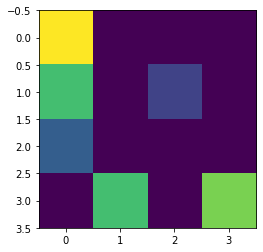

In [82]:
env = LawnmowerEnv()
env.reset()

agent = RandomAgent(env)

obs = env.reset()
done = False


rwd=0
while not done:
    action = agent.step(obs)
    print("Chosen action: ", action)
    observation, reward, done, info = env.step(action)
    rwd+=reward
    print("Obs: ", obs)
    print("Reward: ", reward)
    env.render()
    
print("Total Reward:", rwd)


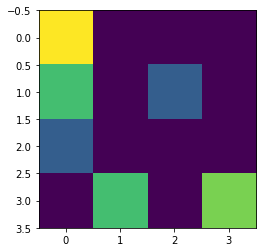

In [83]:
env = LawnmowerEnv()
env.reset()
env.render()